_First, let's import the dataset tools provided with DREAM dataset..._

In [2]:
%load_ext autoreload
%autoreload 2
import dataset_tools as dataset

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


_Next, we import a couple of generic libraries for plotting and data handling..._

In [4]:
%matplotlib inline
import os
from matplotlib import pyplot as plt
import matplotlib
import numpy as np
import pandas as pd

_Now, we are ready to load the dataset and plot it's basic JSON structure._

In [9]:
data = dataset.open('dataset/data_example.json')
print(data.structure())

{
    "$id": "User 37_18_Intervention 2_20171102_123242.369000.json",
    "$schema": "https://raw.githubusercontent.com/dream2020/data/master/specification/dream.1.2.json",
    "ados": {
        "preTest": {
            "communication": 2,
            "interaction": 5,
            "module": 1.0,
            "play": 1,
            "protocol": "ADOS-G",
            "socialCommunicationQuestionnaire": 23,
            "stereotype": 0,
            "total": 7
        }
    },
    "condition": "RET",
    "eye_gaze": {"rx": [],"ry": [],"rz": []},
    "frame_rate": 25.1,
    "head_gaze": {"rx": [],"ry": [],"rz": []},
    "participant": {"ageInMonths": 47,"gender": "male","id": 37},
    "skeleton": {
        "elbow_left": {"confidence": [],"x": [],"y": [],"z": []},
        "elbow_right": {"confidence": [],"x": [],"y": [],"z": []},
        "hand_left": {"confidence": [],"x": [],"y": [],"z": []},
        "hand_right": {"confidence": [],"x": [],"y": [],"z": []},
        "head": {"confidence": [],"x

## Frontal view

(-300.0, 500.0, -700.0, 0.0)

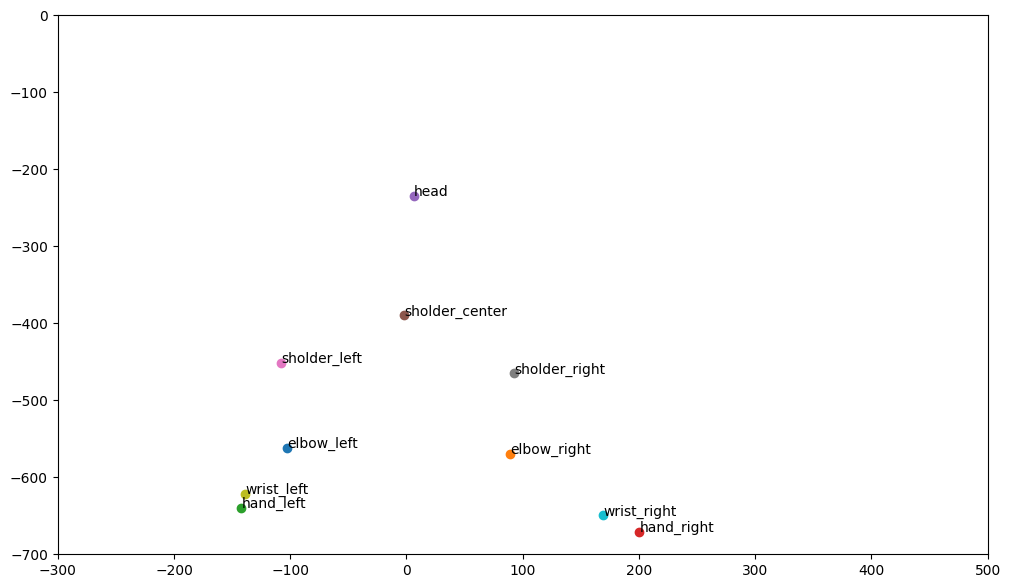

In [10]:
fig, ax = plt.subplots(1,1,figsize=(12, 7))
skeleton = data['skeleton']
frame = 25*16
for key in skeleton:
    x,y = skeleton[key]['x'][frame],skeleton[key]['y'][frame]
    ax.plot(x,y,'o')
    ax.text(x,y,key)
ax.axis([-300,500,-700,0])

## Side view

(-100.0, 1200.0, -700.0, 0.0)

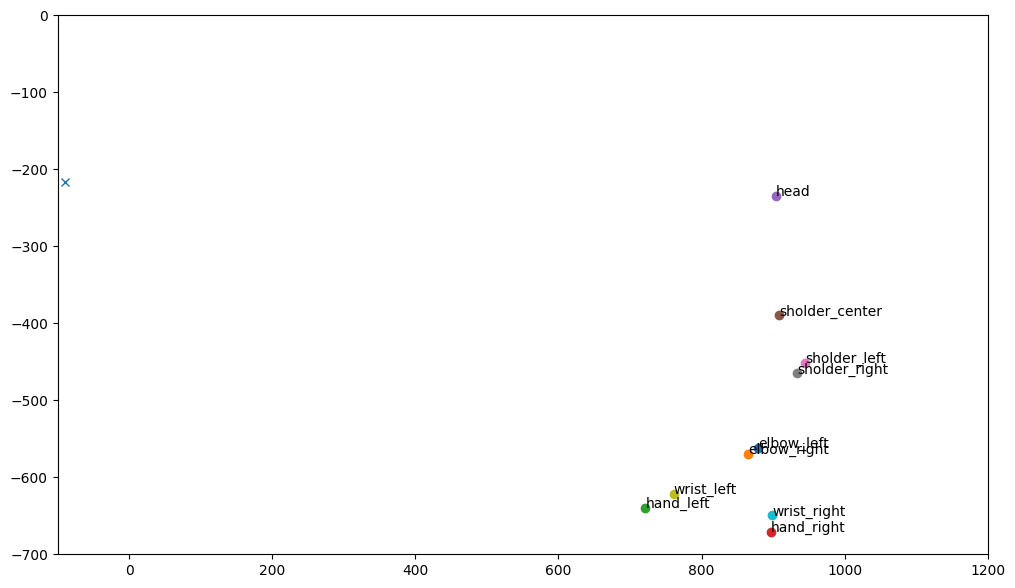

In [11]:
fig, ax = plt.subplots(1,1,figsize=(12, 7))
for key in skeleton:
    x,y = skeleton[key]['z'][frame],skeleton[key]['y'][frame]
    ax.plot(x,y,'o')
    ax.text(x,y,key)

gaze = data.gaze()[frame]
ax.plot(gaze[2],gaze[1],'x')
ax.axis([-100,1200,-700,0])

# Exporting data to other formats
The dataset tools library adds convenience methods for representing the DREAM intervention json-files as DataFrames, from which you can export the data to a variety of different formats. 

In [12]:
myDataFrame = data.to_dataFrame()

In [13]:
data.to_csv('data.csv')

In [17]:
myDataFrame.head()

,ados_preTest_communication,ados_preTest_interaction,ados_preTest_module,ados_preTest_play,ados_preTest_protocol,ados_preTest_socialCommunicationQuestionnaire,ados_preTest_stereotype,ados_preTest_total,condition,eye_gaze_rx,...,skeleton_wrist_right_confidence,skeleton_wrist_right_x,skeleton_wrist_right_y,skeleton_wrist_right_z,task_ability,task_difficultyLevel,task_end,task_index,task_start,time
0,2,5,1.0,1,ADOS-G,23,0,7,RET,NaN,...,NaN,NaN,NaN,NaN,TT,1,10279,18,0,2017-11-02T12:32:42.369000
1,2,5,1.0,1,ADOS-G,23,0,7,RET,-0.265440,...,NaN,NaN,NaN,NaN,TT,1,10279,18,0,2017-11-02T12:32:42.369000
2,2,5,1.0,1,ADOS-G,23,0,7,RET,-0.262348,...,NaN,NaN,NaN,NaN,TT,1,10279,18,0,2017-11-02T12:32:42.369000
3,2,5,1.0,1,ADOS-G,23,0,7,RET,-0.271956,...,NaN,NaN,NaN,NaN,TT,1,10279,18,0,2017-11-02T12:32:42.369000
4,2,5,1.0,1,ADOS-G,23,0,7,RET,-0.284606,...,NaN,NaN,NaN,NaN,TT,1,10279,18,0,2017-11-02T12:32:42.369000


# Working with multiple session files
The intervention protocol used for the clinical study where the DREAM dataset was collected comprise an initial diagnosis, up to 8 interventions, and a final diagnosis. In practice, an intervention is deliverted as a number of *sessions*, where the child is visiting the clinic and interacting with the robot. The DREAM dataset comprise one json-file for each recorded session. The precise number of sessions can vary as a result of practical time constraints, the childs needs for breaks, etc, which also means that the dataset comprise a different number of session files (json-files) for each child. 

Each session is associated with a task, specifying what the child is expected to do during that session. 
Many times it is useful to analyse data over multiple sessions to see trends or differances between conditions. 

Below is a short code displaying all sessions for *User 13*. The code loads each file and tisplays some information about the task, targeting *turn taking (TT)*, *joint attention (JA)*, or *imitation (IM)*. The complete intervention protocol is described in _DREAM Deliverable 1.1_, https://github.com/dream2020/DREAM/blob/master/docs/deliverables/DREAM_Deliverable_D1.1.pdf.

In [30]:
tasks = []
for root, dirs, files in os.walk('dataset/User 13'):
    for f in files:
        if not f.endswith('.json'): continue
        data = dataset.open(os.path.join(root,f))
        t = {}
        t['task'] = data["task"]
        t['intervention'] = f.split('_')[2]
        t['sourceFile'] = f
        tasks.append(t)
sessions = pd.DataFrame(tasks)

In [31]:
sessions

,task,intervention,sourceFile
0,TT,diagnosis abilities,User 13_0_diagnosis abilities_20170324_110537....
1,IM,intervention 1,User 13_10_intervention 1_20170327_112727.7260...
2,IM,intervention 1,User 13_11_intervention 1_20170327_113305.3910...
3,JA,intervention 2,User 13_12_intervention 2_20170331_110342.6330...
4,TT,intervention 2,User 13_13_intervention 2_20170331_110511.8520...
5,TT,intervention 2,User 13_14_intervention 2_20170331_111426.7150...
6,TT,intervention 2,User 13_15_intervention 2_20170331_112659.5520...
7,IM,intervention 2,User 13_16_intervention 2_20170403_110214.4680...
8,TT,intervention 3,User 13_17_intervention 3_20170403_110601.9020...
9,TT,intervention 3,User 13_18_intervention 3_20170403_111241.7370...
